In [13]:
from PIL import Image
import numpy as np
import cv2 as cv
import sys
import matplotlib.pyplot as plt

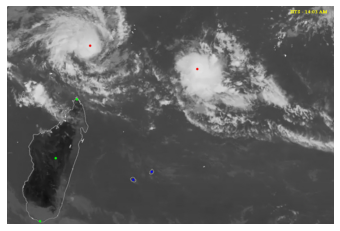

(940, 626)


In [19]:
img = Image.open('./1.jpg')
plt.imshow(img)
plt.axis("off")
plt.show()
print(img.size)

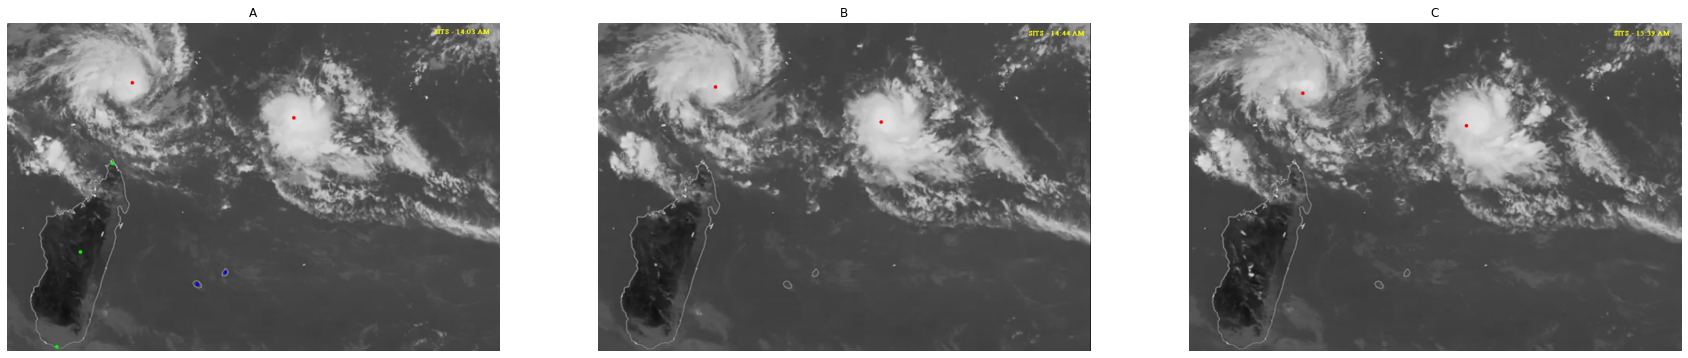

In [52]:
img1 = Image.open('./1.jpg')
img2 = Image.open('./2.jpg')
img3 = Image.open('./3.jpg')

plt.figure(figsize=(30,20))

plt.subplot(1,3,1)
plt.title("A")
plt.imshow(img1)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("B")
plt.imshow(img2)
plt.axis("off")


plt.subplot(1,3,3)
plt.title("C")
plt.imshow(img3)
plt.axis("off")
plt.show()

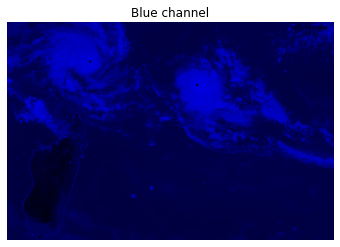

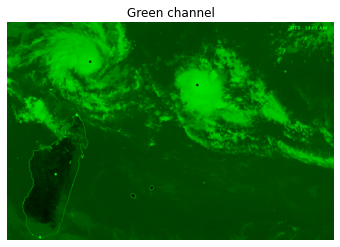

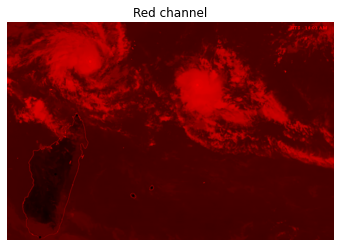

In [41]:
img_blue = np.copy(img)
img_blue[:, :, [0, 1]] = 0
plt.imshow(img_blue)
plt.axis("off")
plt.title("Blue channel")
plt.show()

img_green = np.copy(img)
img_green[:, :, [0, 2]] = 0
plt.imshow(img_green)
plt.axis("off")
plt.title("Green channel")
plt.show()

img_red = np.copy(img)
img_red[:, :, [1, 2]] = 0
plt.imshow(img_red)
plt.axis("off")
plt.title("Red channel")
plt.show()

In [49]:
# first we find the blue points/pixels

for i in range(0,626):
    for j in range(0,940):
        if ((img_red[i][j]).any() == 0)&((img_green[i][j]).any() == 0):
           print(i,j)
            

477 416
498 364
499 362
500 363


In [50]:
# Then we find the green points/pixels

for i in range(0,626):
    for j in range(0,940):
        if ((img_red[i][j]).any() == 0)&((img_blue[i][j]).any() == 0):
           print(i,j)
            

267 199
267 202
268 199
268 200
268 201
268 202
269 200
269 201
435 136
435 139
435 140
436 136
437 136
437 140
437 141
438 136
438 139
438 140
616 94
616 96
617 93
617 94
617 96
618 93
618 94
618 96
619 94


In [54]:
# Finally we find the red points/pixels

for i in range(0,626):
    for j in range(0,940):
        if ((img_green[i][j]).any() == 0)&((img_blue[i][j]).any() == 0):
           print(i,j)
            

115 238
179 546
180 544
180 548
181 547


In [53]:
# Now from the images we know that there are only 2 of each of these points (except for green)
# So we need to take a pair of pixels from each of these colours
# let Green pts be G1,G2,G3
# Blue be B1,B2
# Red in image A be RA1,RA2
# Red in image A be RA1,RA2
# Red in image A be RA1,RA2
# So from the above we find that :
B1 = (477,416)
B2 = (499,363)
G1 = (268,200)
G2 = (436,139)
G3 = (617,94)
RA1 = (115,238)
RA2 = (180,547)

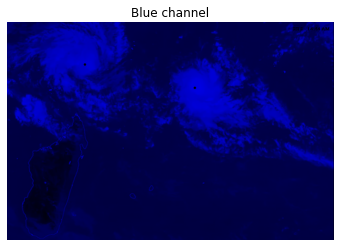

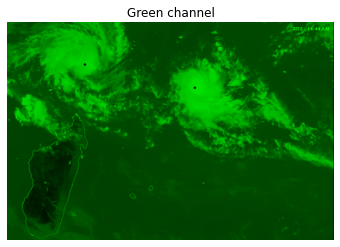

In [55]:
#similarly for image B the red dots,
img2_blue = np.copy(img2)
img2_blue[:, :, [0, 1]] = 0
plt.imshow(img2_blue)
plt.axis("off")
plt.title("Blue channel")
plt.show()

img2_green = np.copy(img2)
img2_green[:, :, [0, 2]] = 0
plt.imshow(img2_green)
plt.axis("off")
plt.title("Green channel")
plt.show()


In [56]:
for i in range(0,626):
    for j in range(0,940):
        if ((img2_green[i][j]).any() == 0)&((img2_blue[i][j]).any() == 0):
           print(i,j)
            

120 223
122 223
122 224
123 224
189 541
190 539


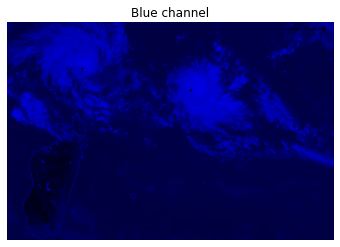

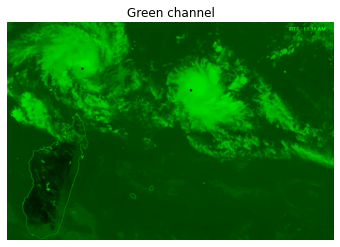

In [57]:
#similarly for image C the red dots,
img3_blue = np.copy(img3)
img3_blue[:, :, [0, 1]] = 0
plt.imshow(img3_blue)
plt.axis("off")
plt.title("Blue channel")
plt.show()

img3_green = np.copy(img3)
img3_green[:, :, [0, 2]] = 0
plt.imshow(img3_green)
plt.axis("off")
plt.title("Green channel")
plt.show()

In [58]:
for i in range(0,626):
    for j in range(0,940):
        if ((img3_green[i][j]).any() == 0)&((img3_blue[i][j]).any() == 0):
           print(i,j)
            

132 215
132 217
134 215
134 216
134 218
194 529
197 527
197 530


In [59]:
# Now from the images we know that there are only 2 of each of these points (except for green)
# So we need to take a pair of pixels from each of these colours
# let Green pts be G1,G2,G3
# Blue be B1,B2
# Red in image A be RA1,RA2
# Red in image A be RA1,RA2
# Red in image A be RA1,RA2
# So from the above we find that :
B1 = (477,416)
B2 = (499,363)
G1 = (268,200)
G2 = (436,139)
G3 = (617,94)
RA1 = (115,238)
RA2 = (180,547)
RB1 = (122,224)
RB2 = (190,540)
RC1 = (132,216)
RC2 = (197,527)

In [66]:
# now we find pixel distances between these points
import math
Dblue = math.sqrt((B1[0]-B2[0])*(B1[0]-B2[0]) + (B1[1]-B2[1])*(B1[1]-B2[1]))
Dgreen = math.sqrt((G1[0]-G3[0])*(G1[0]-G3[0]) + (G1[1]-G3[1])*(G1[1]-G3[1]))
print(Dblue)
print(Dgreen)

57.38466694161429
364.7423748346221


In [68]:
# now we know Dblue = distance between maritius and Reunioin = 250km
# also Dgreen = length of madagascar = 1500km
# so now calculating pixel to actual distance
pd1 = 250/Dblue
pd2 = 1500/Dgreen
print(pd1)
print(pd2)
pdavg = (pd1+pd2)/2
print(pdavg)
# so average distance per pixel is 4.2345 km 

4.35656445047178
4.112491729758888
4.234528090115335


In [69]:
# Now as discussed in class the trajectory can be approximated as a straigt line passing throuh red points of images B and C
# So for BELNA equation of trajectory can be given as:
# y-RB1[1] = (RC1[1]-RB1[1])*(x-RB1[0]/(RC1[0]-RB1[0])
# y - 224 = -0.8*(x-122)



# similarly for AMBALI:
# y-RB[1] = (RC[1]-RB[1])*(x-RB[0])/(RC[0]-RB[0])
# y- 540 = -1.857*(x-190)



# so they intersect at approx. (540,-110)
# since y-coordinate is negative which is opppossite to direction of propagation, so
# I DONT THINK THEY WILL MEET/COLLIDE IN FUTURE
# ALSO THIS APOJUNCTURE IS OUT OF THE IMAGE FRAME

In [70]:
# now distance of this APOJUNCTURE from  the CAPITAL i.e. G2
APJ = (540,-110)
pixelDapo = math.sqrt((G2[0]-APJ[0])*(G2[0]-APJ[0]) + (G2[1]-APJ[1])*(G2[1]-APJ[1]))
DistanceApoj = pixelDapo*pdavg
print(pixelDapo)
print(DistanceApoj)

269.8462525216906
1142.671536315455


In [71]:
# SO the distance of apojuncture from  the capital is 1142 km
